In [4]:
#Modulos necesarios

import cv2 
import os
import glob
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [5]:
#Cargar imagenes para pruebas

#Cigar-shaped smooth
cigar_shaped_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/Cigar-shaped smooth/*.jpg"
paths_cigar = glob.glob(cigar_shaped_folder)
images_cigar_shaped = [cv2.imread(path) for path in paths_cigar[:10] if cv2.imread(path) is not None]

#Completely round smooth
round_smooth_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/completely round smooth/*.jpg"
paths_round = glob.glob(round_smooth_folder)
images_round = [cv2.imread(path) for path in paths_round[:10] if cv2.imread(path) is not None]

#edge-on
edge_on_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/edge-on/*.jpg"
paths_edge_on = glob.glob(edge_on_folder)
images_edge_on = [cv2.imread(path) for path in paths_edge_on[:10] if cv2.imread(path) is not None]

#in between smooth
in_between_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/In between smooth/*.jpg"
paths_in_between = glob.glob(in_between_folder)
images_in_between = [cv2.imread(path) for path in paths_in_between[:10] if cv2.imread(path) is not None]

#spiral
spiral_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/spiral/*.jpg"
paths_spiral = glob.glob(spiral_folder)
images_spiral = [cv2.imread(path) for path in paths_spiral[:10] if cv2.imread(path) is not None]

#Categorias

label =['Cigar shaped smooth','completely round smooth','edge-on','in betwwen smooth','spiral']



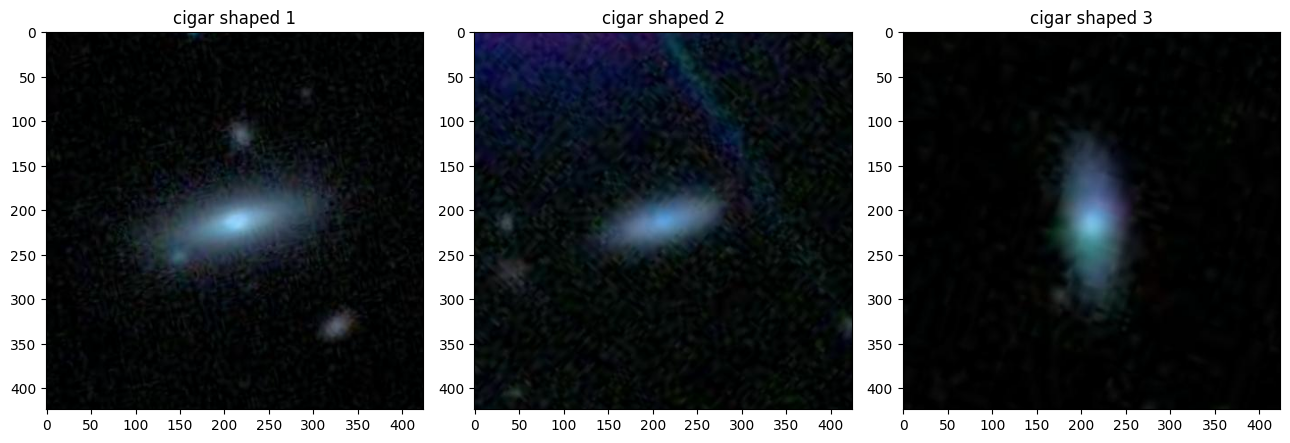

In [55]:
#Previsualizacion de las imagenes originales


def show_images(folder, title):
    
    plt.figure(figsize=(13,5))
    
    for index,img in enumerate(folder[:3]):
        if img is not None:
            plt.subplot(1,3,index + 1)
            plt.imshow(img)
            plt.title(f"{title} {index + 1}")
        else:
            print(f"no se pudo leer la imagen")
            
    plt.tight_layout()
    plt.show()
    
show_images(images_cigar_shaped,'cigar shaped')            

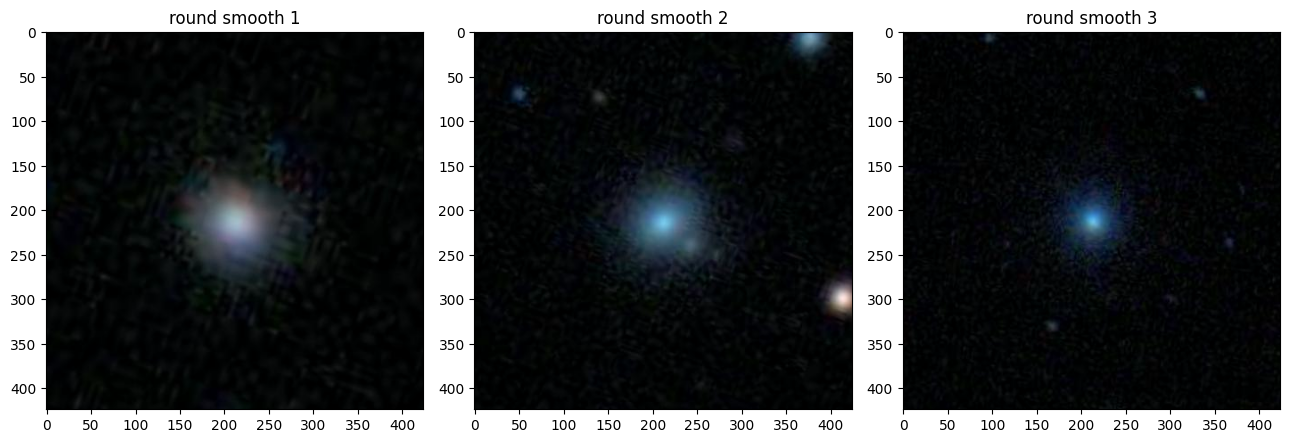

In [56]:
show_images(images_round,'round smooth')  

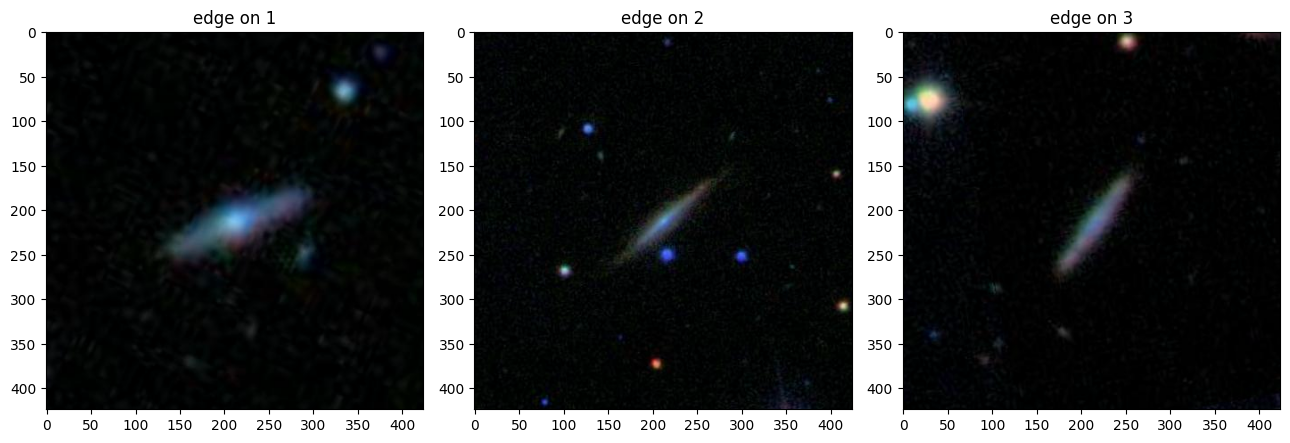

In [57]:
show_images(images_edge_on,'edge on')  

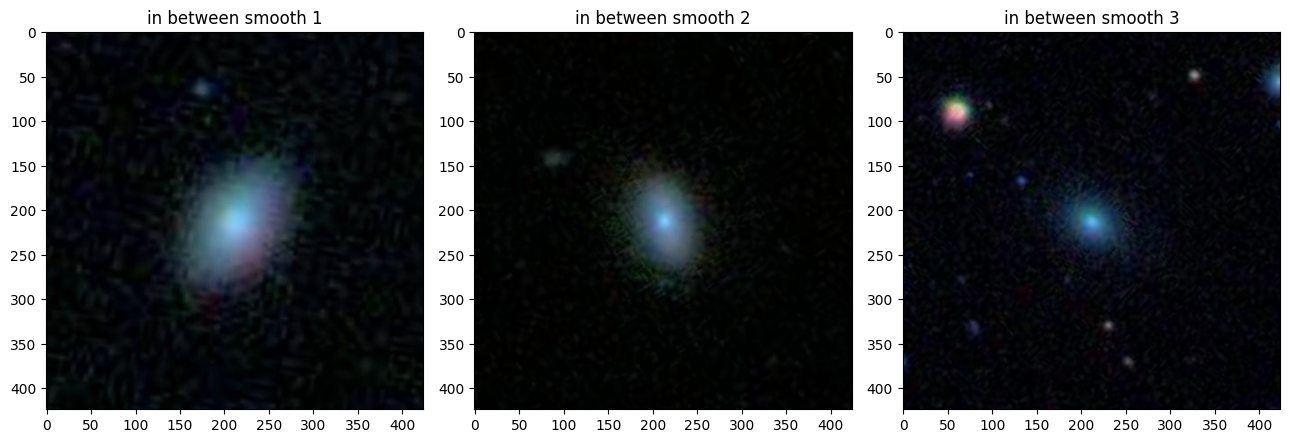

In [58]:
show_images(images_in_between,'in between smooth')  



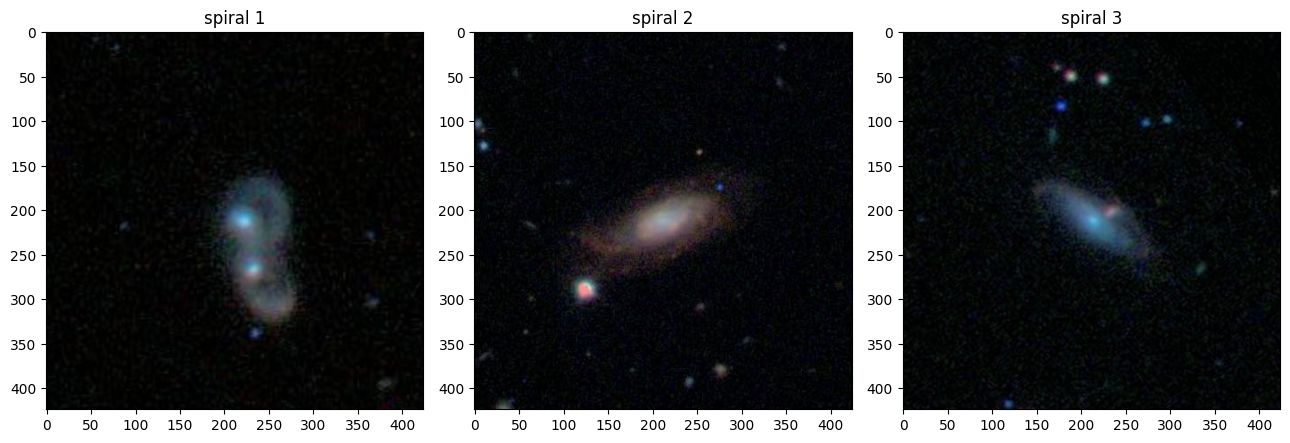

In [183]:
show_images(images_spiral,'spiral') 

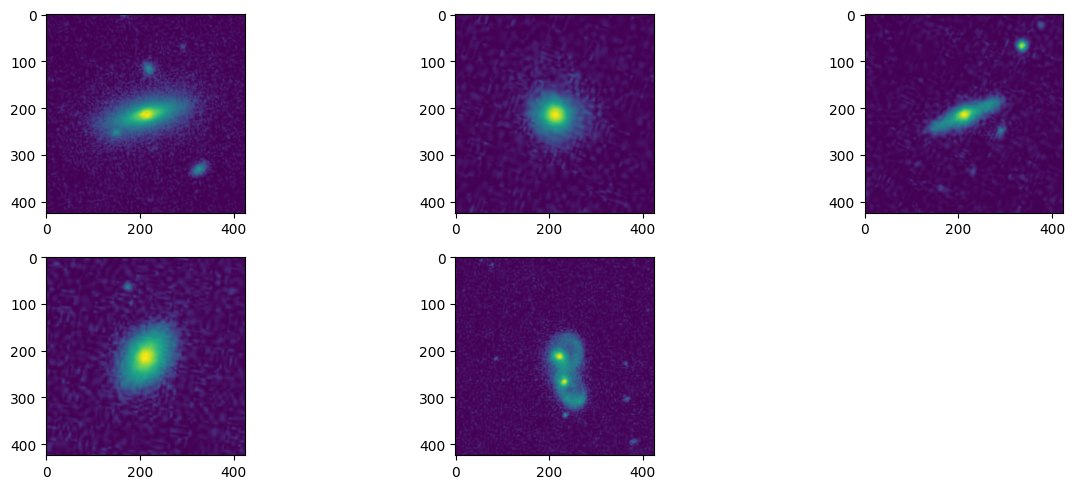

In [59]:
#Transformacion a blanco y negro, prueba con primera imagenes
cigar_1 = cv2.cvtColor(images_cigar_shaped[0], cv2.COLOR_RGB2GRAY)
round_1 = cv2.cvtColor(images_round[0], cv2.COLOR_RGB2GRAY)
edge_1 = cv2.cvtColor(images_edge_on[0], cv2.COLOR_RGB2GRAY)
in_between_1 = cv2.cvtColor(images_in_between[0], cv2.COLOR_RGB2GRAY)
spiral_1 = cv2.cvtColor(images_spiral[0], cv2.COLOR_RGB2GRAY)

test_images = [cigar_1,round_1,edge_1,in_between_1,spiral_1]

plt.figure(figsize=(13,5))

for index,img in enumerate(test_images):
    plt.subplot(2,3, index + 1)
    plt.imshow(img)
    
plt.tight_layout()
plt.show()    
    
    


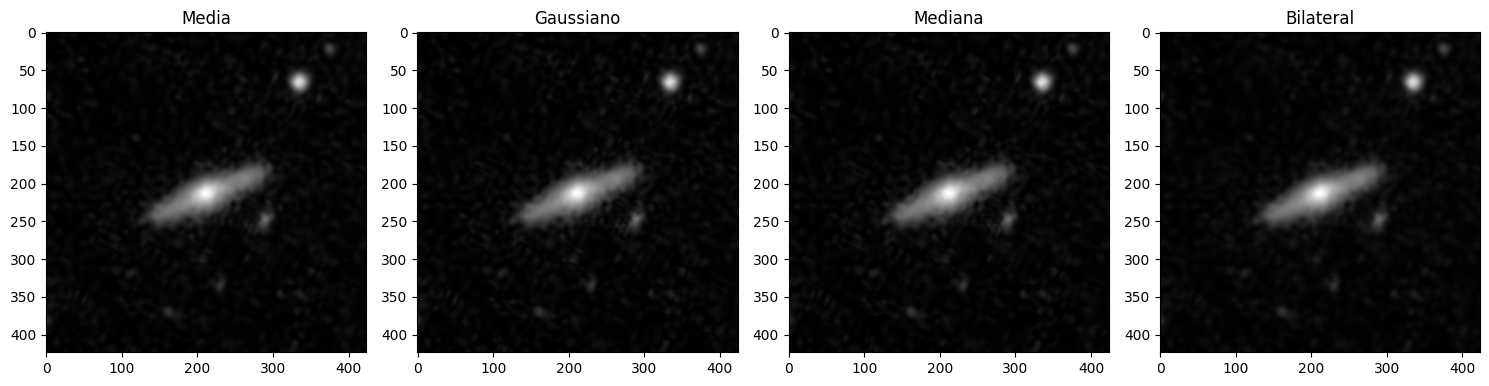

In [62]:
#Visualizacion de diferente filtros de suavizado

img = test_images[2]
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.blur(img, (5, 5)), cmap='gray')
plt.title("Media")

plt.subplot(1, 4, 2)
plt.imshow(cv2.GaussianBlur(img, (5, 5), 0), cmap='gray')
plt.title("Gaussiano")

plt.subplot(1, 4, 3)
plt.imshow(cv2.medianBlur(img, 5), cmap='gray')
plt.title("Mediana")

plt.subplot(1, 4, 4)
plt.imshow(cv2.bilateralFilter(img, 9, 75, 75), cmap='gray')
plt.title("Bilateral")

plt.tight_layout()
plt.show()

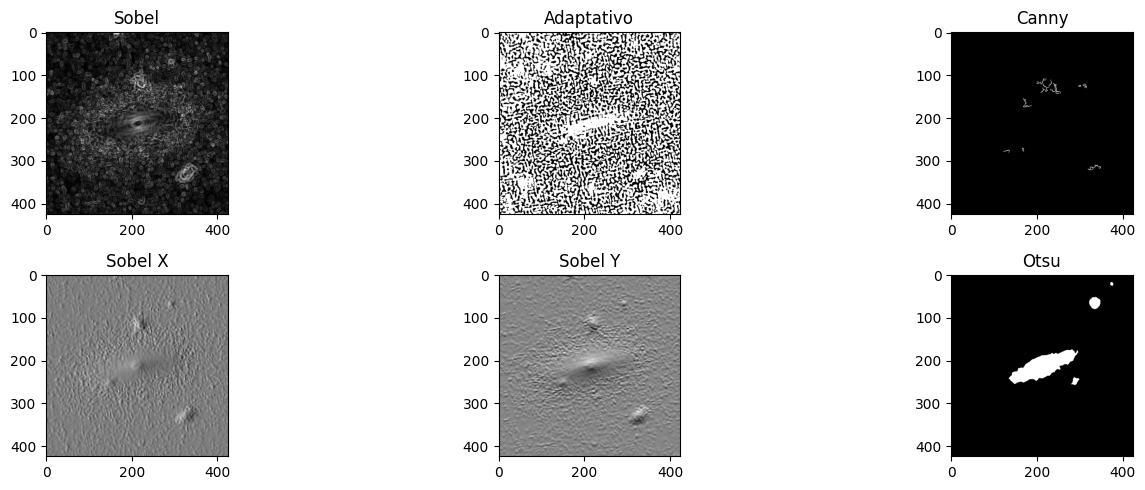

In [100]:
#Deteccion de bordes

gray= test_images[0]



sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobelx, sobely)

adaptative=cv2.adaptiveThreshold(gray, 250, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)


canny = cv2.Canny(gray, 50, 150)

_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel")

plt.subplot(2, 3, 2)
plt.imshow(adaptative, cmap='gray')
plt.title("Adaptativo")

plt.subplot(2, 3, 3)
plt.imshow(canny, cmap='gray')
plt.title("Canny")

plt.subplot(2, 3, 4)
plt.imshow(sobelx, cmap='gray')
plt.title("Sobel X")

plt.subplot(2, 3, 5)
plt.imshow(sobely, cmap='gray')
plt.title("Sobel Y")

plt.subplot(2, 3, 6)
plt.imshow(otsu, cmap='gray')
plt.title("Otsu")

plt.tight_layout()
plt.show()


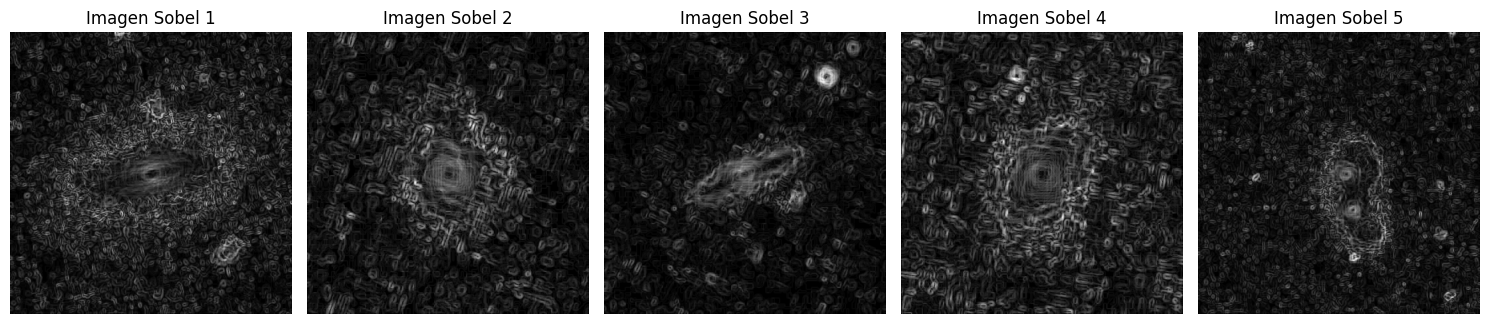

In [76]:
def show_sobel_images(image_list, titles=None):
    plt.figure(figsize=(15, 5))

    for i, img in enumerate(image_list):
        if img is None:
            continue
        
        # Aplicar Sobel directamente (imagen ya en gris)
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        sobel = cv2.magnitude(sobelx, sobely)

        # Mostrar
        plt.subplot(1, len(image_list), i+1)
        plt.imshow(sobel, cmap='gray')
        title = titles[i] if titles else f"Imagen Sobel {i+1}"
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_sobel_images(test_images)

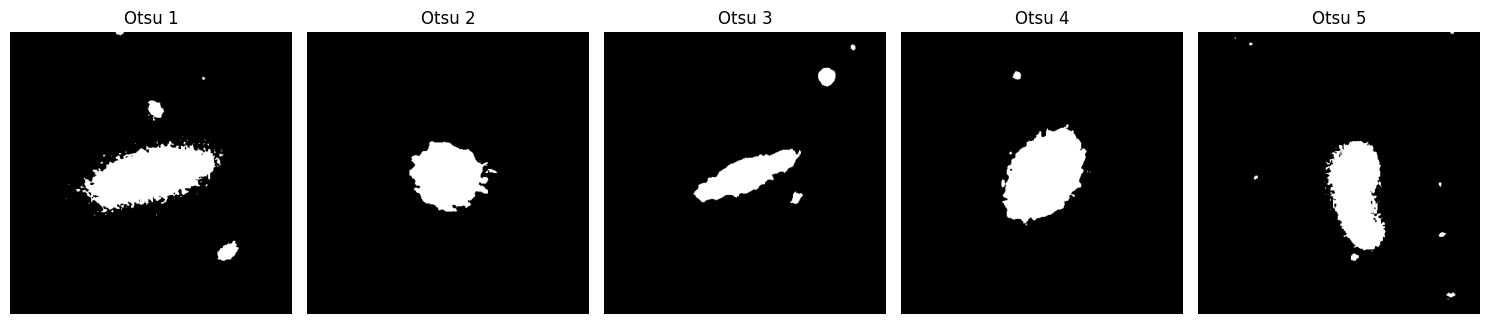

In [77]:
def show_otsu_images(image_list, titles=None):
    plt.figure(figsize=(15, 5))

    for i, img in enumerate(image_list):
        if img is None:
            continue
        
        # Aplicar Otsu
        _, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Mostrar
        plt.subplot(1, len(image_list), i + 1)
        plt.imshow(otsu, cmap='gray')
        title = titles[i] if titles else f"Imagen Otsu {i+1}"
        plt.title(f"{title}\n(Otsu)" if titles else f"Otsu {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
show_otsu_images(test_images)    

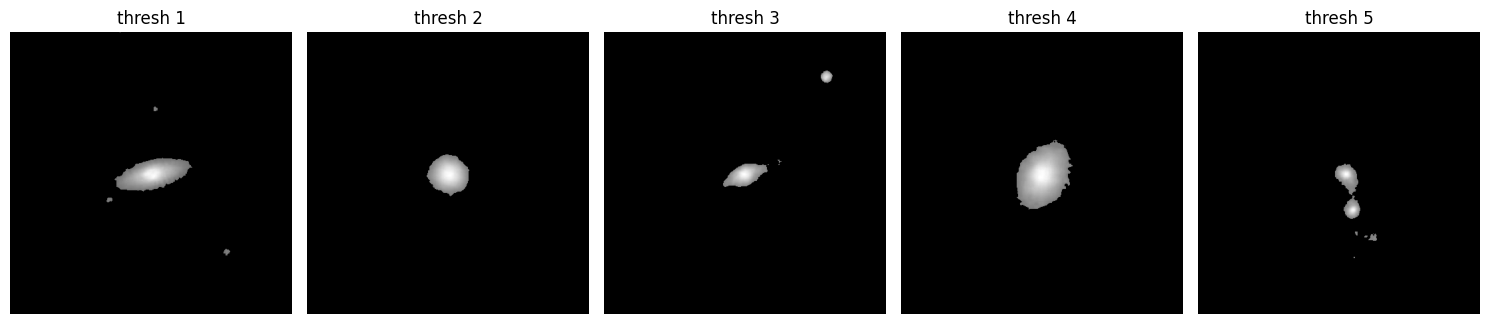

In [106]:
def show_thres_images(image_list, titles=None):
    plt.figure(figsize=(15, 5))

    for i, img in enumerate(image_list):
        if img is None:
            continue
        
        # Aplicar Otsu
        _, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

        resultado = cv2.bitwise_and(img, img, mask=thresh)
        # Mostrar
        plt.subplot(1, len(image_list), i + 1)
        plt.imshow(resultado, cmap='gray')
        title = titles[i] if titles else f"Imagen Otsu {i+1}"
        plt.title(f"{title}\n(thresh)" if titles else f"thresh {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
show_thres_images(test_images)    

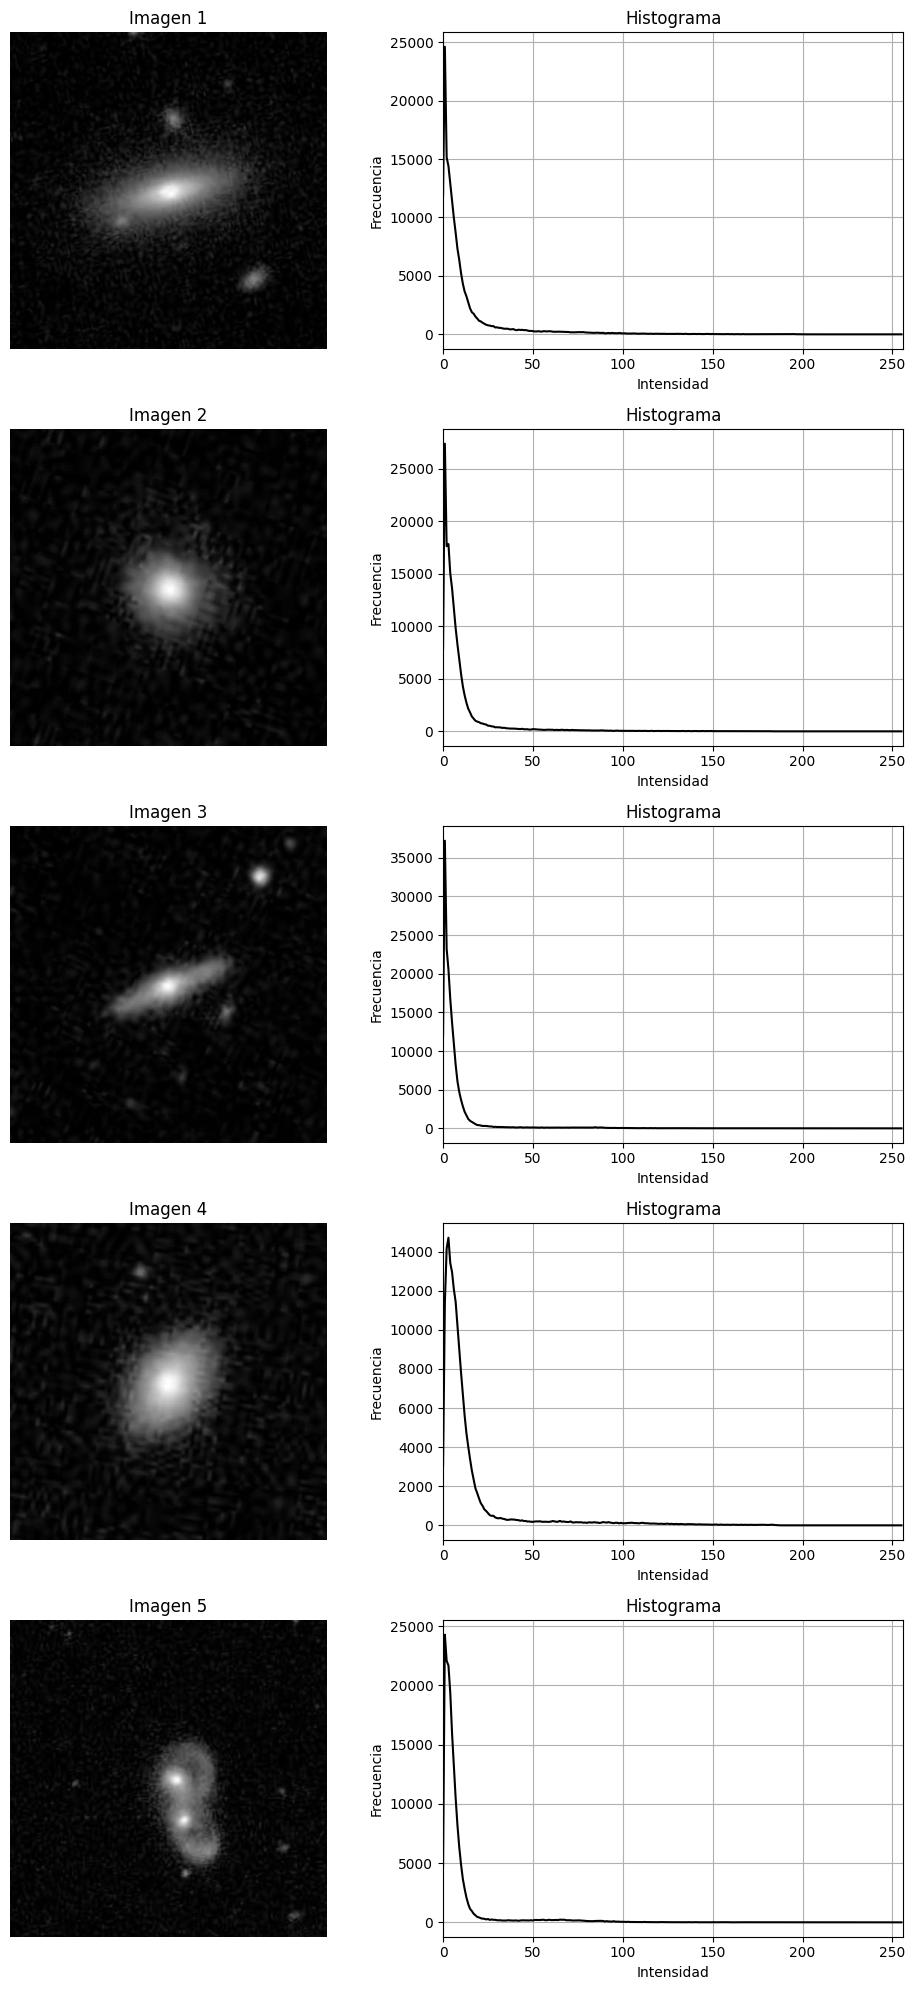

In [107]:
def show_image_and_histogram(images, titles=None):
    n = len(images)
    plt.figure(figsize=(10, 4 * n))

    for i, img in enumerate(images):
        if img is None:
            continue

        # Mostrar la imagen
        plt.subplot(n, 2, 2 * i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titles[i] if titles else f"Imagen {i+1}")
        plt.axis('off')

        # Calcular y mostrar el histograma
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.subplot(n, 2, 2 * i + 2)
        plt.plot(hist, color='black')
        plt.title("Histograma")
        plt.xlabel("Intensidad")
        plt.ylabel("Frecuencia")
        plt.xlim([0, 256])
        plt.grid(True)

    plt.tight_layout()
    plt.show()
    
show_image_and_histogram(test_images)    

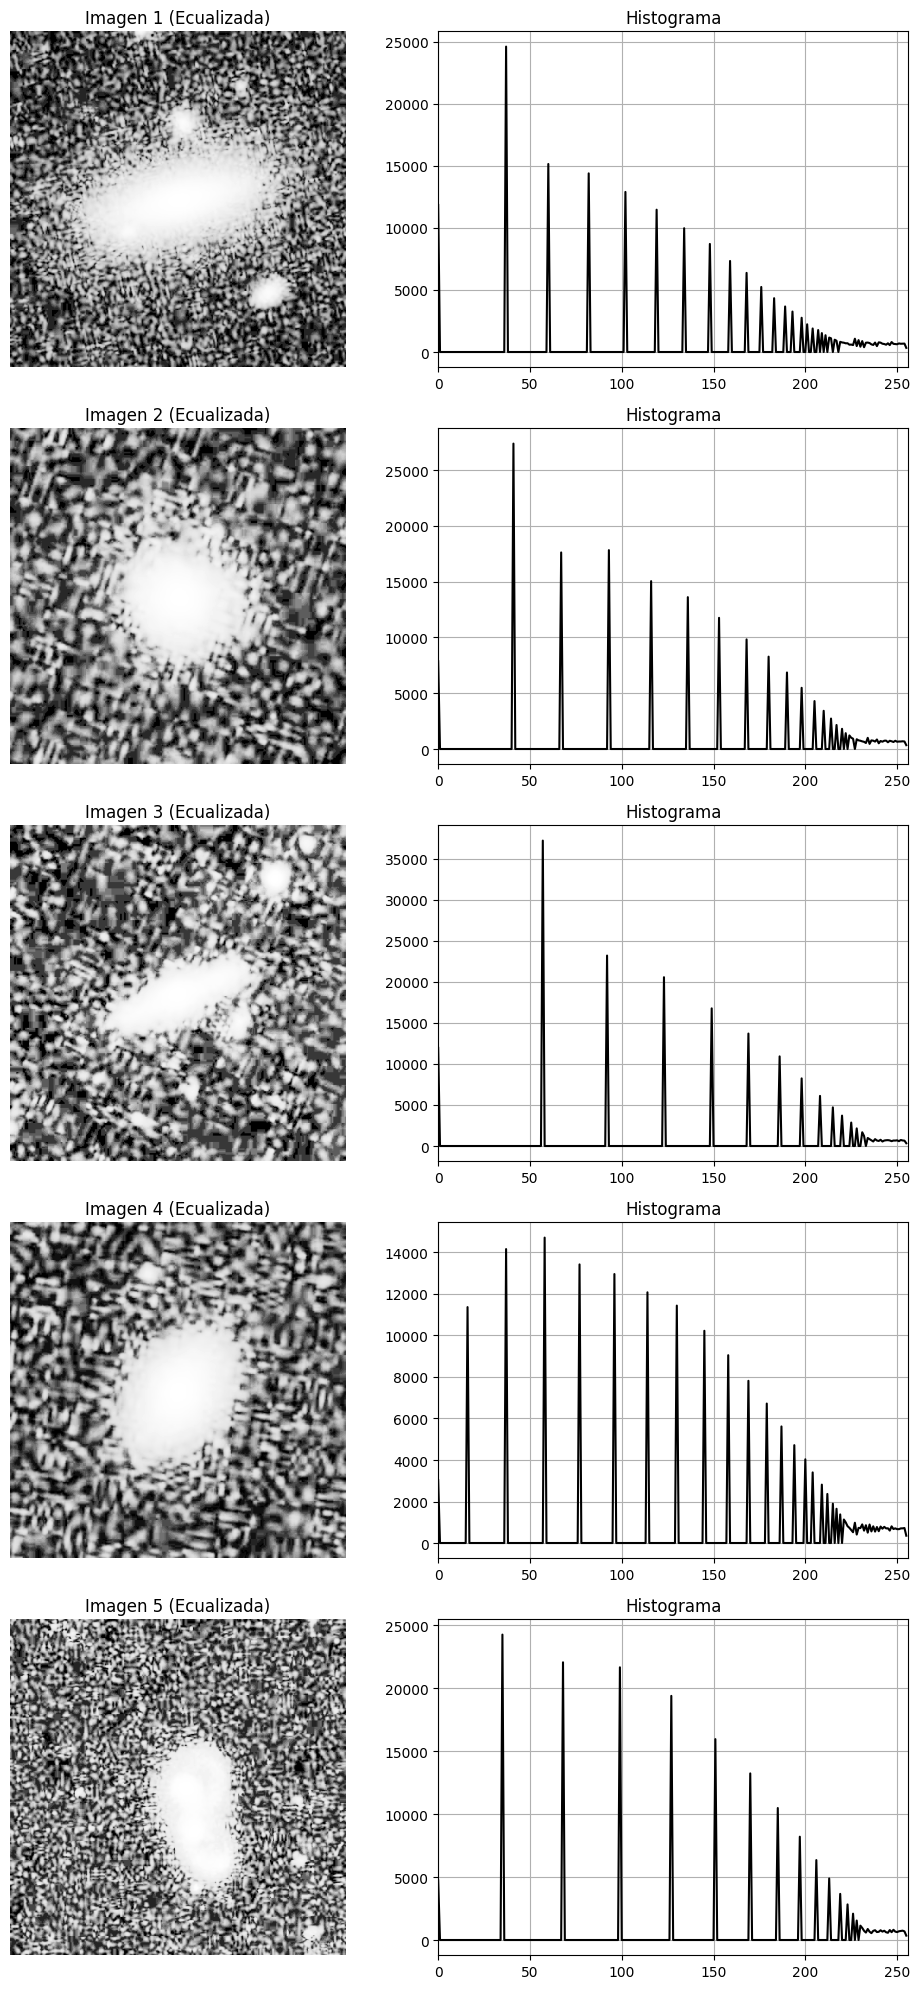

In [108]:
def show_equalized_only(images, titles=None):
    n = len(images)
    plt.figure(figsize=(10, 4 * n))

    for i, img in enumerate(images):
        if img is None:
            continue

        # Ecualizar imagen
        eq_img = cv2.equalizeHist(img)
        hist_eq = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

        row = 2 * i

        # Imagen ecualizada
        plt.subplot(n, 2, row + 1)
        plt.imshow(eq_img, cmap='gray')
        plt.title(f"{titles[i]} (Ecualizada)" if titles else f"Imagen {i+1} (Ecualizada)")
        plt.axis('off')

        # Histograma ecualizado
        plt.subplot(n, 2, row + 2)
        plt.plot(hist_eq, color='black')
        plt.title("Histograma")
        plt.xlim([0, 256])
        plt.grid(True)

    plt.tight_layout()
    plt.show()
    
show_equalized_only(test_images)    

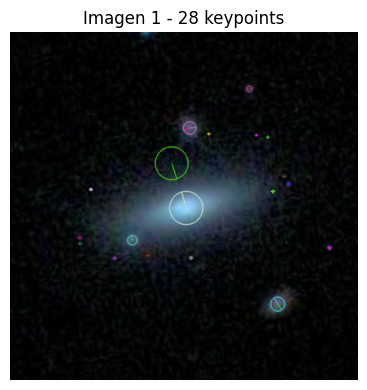

In [116]:
def apply_sift(images, titles=None):
    sift = cv2.SIFT_create()
    n = len(images)
    plt.figure(figsize=(10, 4 * n))

    for i, img in enumerate(images):
        if img is None:
            continue

        # Detectar keypoints y descriptores
        keypoints, descriptors = sift.detectAndCompute(img, None)

        # Dibujar keypoints sobre la imagen
        img_sift = cv2.drawKeypoints(img, keypoints, None,
                                     flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        # Mostrar imagen con keypoints
        plt.subplot(n, 1, i + 1)
        plt.imshow(img_sift, cmap='gray')
        title = titles[i] if titles else f"Imagen {i+1}"
        plt.title(f"{title} - {len(keypoints)} keypoints")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
apply_sift([images_cigar_shaped[0]])   

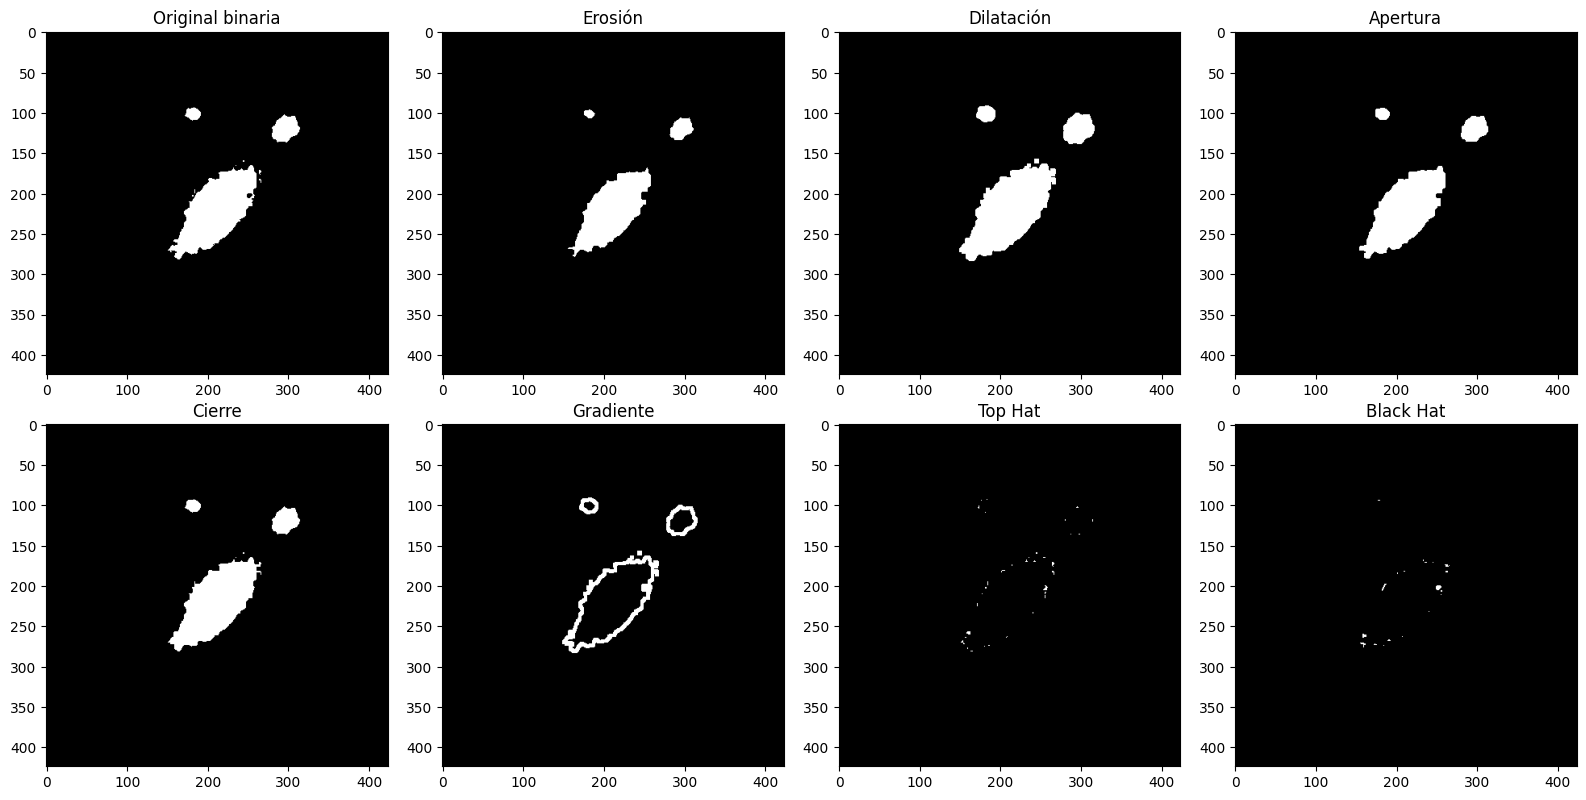

In [182]:

def visualizar_morfologia(img_binaria):
    # Crear un kernel (elemento estructurante)
    kernel = np.ones((5,5), np.uint8)

    # Aplicar operaciones morfológicas
    erosion     = cv2.erode(img_binaria, kernel, iterations=1)
    dilatacion  = cv2.dilate(img_binaria, kernel, iterations=1)
    apertura    = cv2.morphologyEx(img_binaria, cv2.MORPH_OPEN, kernel)
    cierre      = cv2.morphologyEx(img_binaria, cv2.MORPH_CLOSE, kernel)
    gradiente   = cv2.morphologyEx(img_binaria, cv2.MORPH_GRADIENT, kernel)
    tophat      = cv2.morphologyEx(img_binaria, cv2.MORPH_TOPHAT, kernel)
    blackhat    = cv2.morphologyEx(img_binaria, cv2.MORPH_BLACKHAT, kernel)

    # Lista de resultados y títulos
    resultados = [img_binaria, erosion, dilatacion, apertura, cierre, gradiente, tophat, blackhat]
    titulos = ['Original binaria', 'Erosión', 'Dilatación', 'Apertura', 'Cierre', 
               'Gradiente', 'Top Hat', 'Black Hat']

    # Visualizar con subplots
    plt.figure(figsize=(16, 8))
    for i in range(len(resultados)):
        plt.subplot(2, 4, i+1)
        plt.imshow(resultados[i], cmap='gray')
        plt.title(titulos[i])
    plt.tight_layout()
    plt.show()

_, thresh = cv2.threshold(cv2.cvtColor(images_spiral[10], cv2.COLOR_RGB2GRAY), 60, 255, cv2.THRESH_BINARY)
_, otsu = cv2.threshold(cv2.cvtColor(images_spiral[122], cv2.COLOR_RGB2GRAY), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)    
visualizar_morfologia(otsu)    

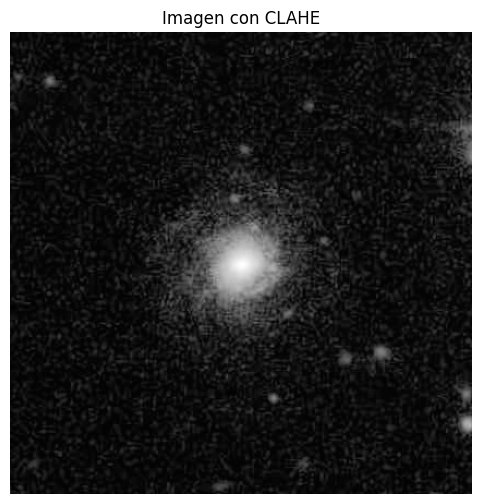

In [186]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(cv2.cvtColor(images_spiral[10], cv2.COLOR_RGB2GRAY))

plt.figure(figsize=(6,6))
plt.imshow(img_clahe, cmap='gray')
plt.title("Imagen con CLAHE")
plt.axis('off')
plt.show()

In [31]:
length_dataset = 500

#Cigar-shaped smooth
cigar_shaped_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/Cigar-shaped smooth/*.jpg"
paths_cigar = glob.glob(cigar_shaped_folder)
images_cigar_shaped = [cv2.imread(path) for path in paths_cigar[:length_dataset] if cv2.imread(path) is not None]

#Completely round smooth
round_smooth_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/completely round smooth/*.jpg"
paths_round = glob.glob(round_smooth_folder)
images_round = [cv2.imread(path) for path in paths_round[:length_dataset] if cv2.imread(path) is not None]

#edge-on
edge_on_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/edge-on/*.jpg"
paths_edge_on = glob.glob(edge_on_folder)
images_edge_on = [cv2.imread(path) for path in paths_edge_on[:length_dataset] if cv2.imread(path) is not None]

#in between smooth
in_between_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/In between smooth/*.jpg"
paths_in_between = glob.glob(in_between_folder)
images_in_between = [cv2.imread(path) for path in paths_in_between[:length_dataset] if cv2.imread(path) is not None]

#spiral
spiral_folder = "/Users/nicolasdussan/Documents/Galaxias/Imagenes/spiral/*.jpg"
paths_spiral = glob.glob(spiral_folder)
images_spiral = [cv2.imread(path) for path in paths_spiral[:length_dataset] if cv2.imread(path) is not None]

#Categorias

labels =['Cigar shaped smooth','completely round smooth','edge-on','in betwwen smooth','spiral']


In [32]:
images = images_cigar_shaped + images_round + images_edge_on + images_in_between +images_spiral
labels = [label[0]]*length_dataset + length_dataset*[label[1]] +length_dataset*[label[2]] + length_dataset*[label[3]] + length_dataset*[label[4]]


In [46]:
images= images_cigar_shaped + images_round
labels = [label[0]]*length_dataset + length_dataset*[label[1]]

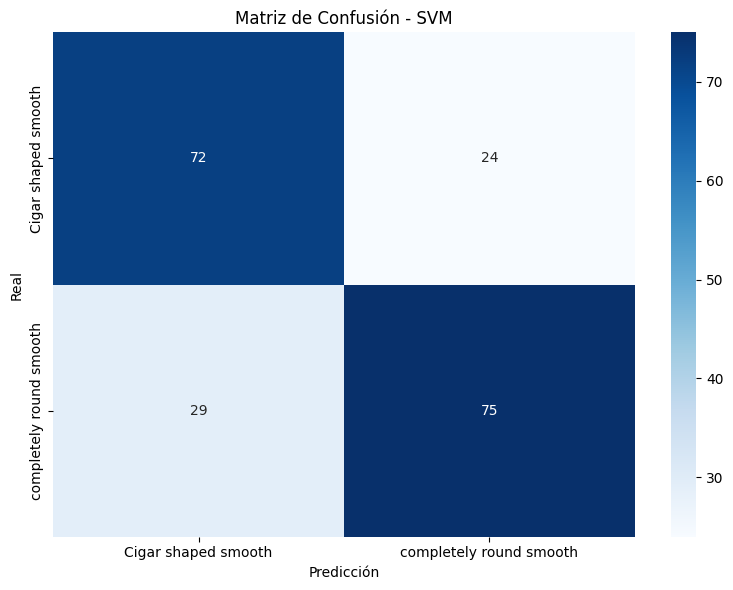

Reporte de Clasificación:
                          precision    recall  f1-score   support

    Cigar shaped smooth       0.71      0.75      0.73        96
completely round smooth       0.76      0.72      0.74       104

               accuracy                           0.73       200
              macro avg       0.74      0.74      0.73       200
           weighted avg       0.74      0.73      0.74       200



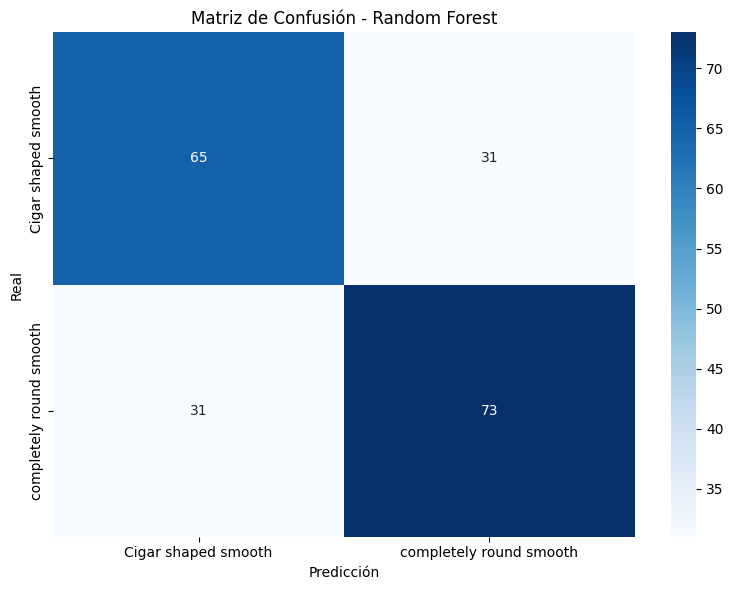

Reporte de Clasificación:
                          precision    recall  f1-score   support

    Cigar shaped smooth       0.68      0.68      0.68        96
completely round smooth       0.70      0.70      0.70       104

               accuracy                           0.69       200
              macro avg       0.69      0.69      0.69       200
           weighted avg       0.69      0.69      0.69       200



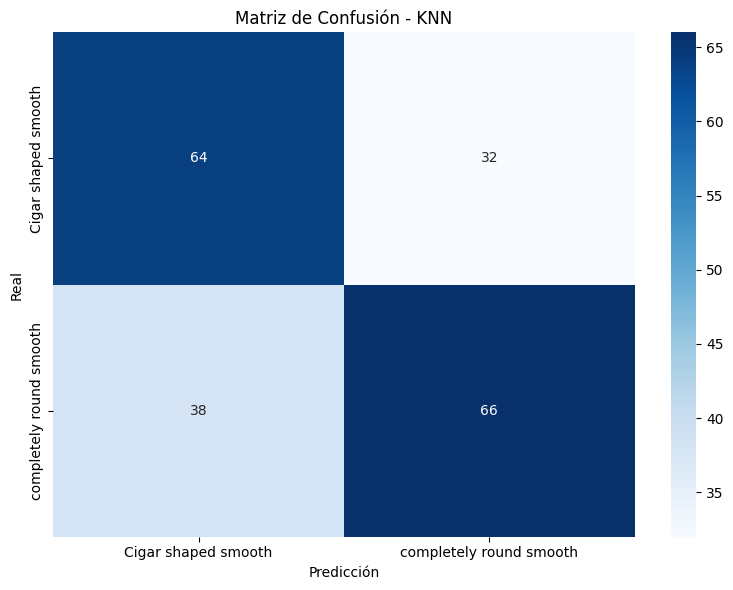

Reporte de Clasificación:
                          precision    recall  f1-score   support

    Cigar shaped smooth       0.63      0.67      0.65        96
completely round smooth       0.67      0.63      0.65       104

               accuracy                           0.65       200
              macro avg       0.65      0.65      0.65       200
           weighted avg       0.65      0.65      0.65       200



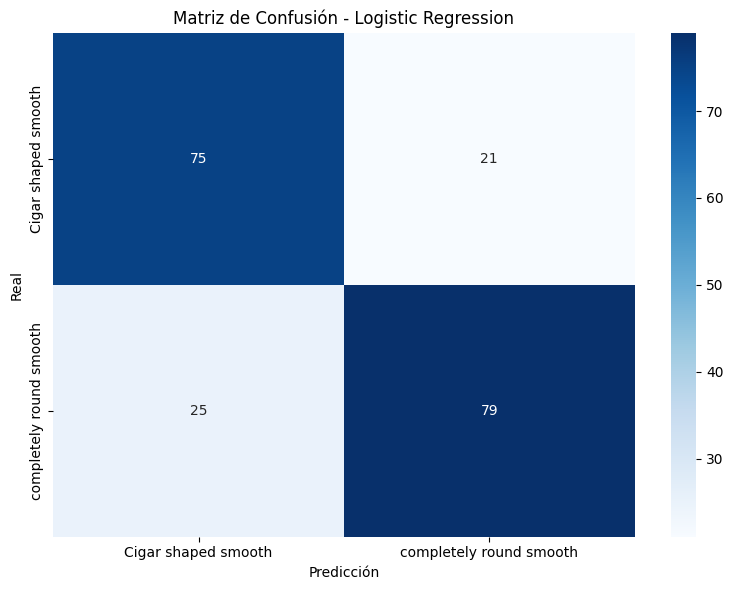

Reporte de Clasificación:
                          precision    recall  f1-score   support

    Cigar shaped smooth       0.75      0.78      0.77        96
completely round smooth       0.79      0.76      0.77       104

               accuracy                           0.77       200
              macro avg       0.77      0.77      0.77       200
           weighted avg       0.77      0.77      0.77       200



In [55]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV





class SobelFilter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        sobel_images = []
        for img in X:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img
            sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
            sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
            sobel = np.sqrt(sobelx**2 + sobely**2)
            sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX)
            sobel = sobel.astype(np.uint8)
            sobel_images.append(sobel)
        return sobel_images

class BoVWTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, k=50):
        self.k = k
        self.sift = cv2.SIFT_create()
        self.kmeans = MiniBatchKMeans(n_clusters=self.k)

    def fit(self, X, y=None):
        descriptors = []
        for img in X:
            if img is None or img.size == 0:
                continue
            img = np.clip(img, 0, 255).astype(np.uint8)
            kp, des = self.sift.detectAndCompute(img, None)
            if des is not None:
                descriptors.append(des)

        descriptors = np.vstack(descriptors)
        self.kmeans.fit(descriptors)
        return self

    def transform(self, X, y=None):
        histograms = []
        for img in X:
            if img is None or img.size == 0:
                histograms.append(np.zeros(self.k))
                continue
            img = np.clip(img, 0, 255).astype(np.uint8)
            kp, des = self.sift.detectAndCompute(img, None)
            if des is not None:
                words = self.kmeans.predict(des)
                hist, _ = np.histogram(words, bins=np.arange(self.k + 1))
            else:
                hist = np.zeros(self.k)
            histograms.append(hist)
        return np.array(histograms)


classifiers = {
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    

}


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42) 


for name, clf in classifiers.items():
    pipeline = Pipeline([
        
        ('sobel', SobelFilter()),
        ('bovw', BoVWTransformer(k=50)),
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])


    pipeline.fit(X_train, y_train)
    
    # Predecimos
    y_pred = pipeline.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {name}')
    plt.tight_layout()
    plt.show()

    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


In [58]:
param_grid = [
    {
        'clf': [SVC(probability=True)],
        'clf__C': [0.1, 1],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale'],
        'bovw__k': [30, 50]
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 150],
        'clf__max_depth': [10, None],
        'bovw__k': [30, 50]
    },
    {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5],
        'clf__weights': ['uniform', 'distance'],
        'bovw__k': [30, 50]
    },
    {
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__C': [0.01, 0.1, 1],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs'],
        'bovw__k': [30, 50]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=1)
grid_search.fit(X_train, y_train)


print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor precisión:")
print(grid_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=0.1, clf__gamma=scale, clf__kernel=linear; total time=  28.8s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=0.1, clf__gamma=scale, clf__kernel=linear; total time=  29.4s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=0.1, clf__gamma=scale, clf__kernel=linear; total time=  31.0s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=0.1, clf__gamma=scale, clf__kernel=rbf; total time=  31.9s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=0.1, clf__gamma=scale, clf__kernel=rbf; total time=  32.3s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=0.1, clf__gamma=scale, clf__kernel=rbf; total time=  32.4s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=1, clf__gamma=scale, clf__kernel=linear; total time=  32.9s
[CV] END bovw__k=30, clf=SVC(probability=True), clf__C=1, clf__gamma=scale, clf__kernel=linear; total time=  33.2s
[CV] END bovw__k